#### Statistical Rigor

- This is aimed to help you understand how we use statistics to get an understanding of the data

#### About dataset

This dataset contain information on Data Science books listed on Amazon website. I have used this data to complete an exploratory data analysis from the year of 2015 through 2022.

- The columns listed in the dataset are:
- Title -title of the book
- Author - authors of the book
- Pages - Total page number
- Avg_review - Average review of the book listed on the Amazon website
- n_reviews - Total number of reviews
- star5 - percent of five star received out of the total reviews
- star4- percent of four star received out of the total reviews
- start3 -percent of three star received out of the total reviews
- star2 - percent of two star received out of the total reviews
- star1 - percent of one star received out of the total reviews
- dimension - height x width x length of the book in inches
- weight - weight of the book in lbs
- language - language in which the book was published
- publisher - name of the publisher, edition, and the publication year
- ISBN_13 - 13 digits unique code for each book
- link - link used on the Amazon website
- complete_link - full link to go land on the website

- These are the few features of the datasets:
- There are 946 unique entries for the books
- Most of the books have all information listed
- Can be used for EDA or Hypothesis testing


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
data = pd.read_csv("final_book_dataset_kaggle.csv")

In [10]:
data.head()

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...


In [11]:
data.shape

(946, 18)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          946 non-null    object 
 1   author         824 non-null    object 
 2   price          944 non-null    float64
 3   pages          934 non-null    float64
 4   avg_reviews    823 non-null    float64
 5   n_reviews      946 non-null    int64  
 6   star5          946 non-null    float64
 7   star4          946 non-null    float64
 8   star3          946 non-null    float64
 9   star2          946 non-null    float64
 10  star1          946 non-null    float64
 11  dimensions     914 non-null    object 
 12  weight         943 non-null    object 
 13  language       943 non-null    object 
 14  publisher      942 non-null    object 
 15  ISBN_13        945 non-null    object 
 16  link           946 non-null    object 
 17  complete_link  946 non-null    object 
dtypes: float64

#### What to look for in the statistical summary of your dataset

1. Mean
 - It gives you an idea of the "typical" value if you could evenly distribute all values.
    - High mean: The dataset has larger values overall.
    - Low mean: The dataset has smaller values overall.
2. Median
  - The median is the middle value of your dataset when it’s sorted.
  - Less sensitive to outliers than the mean, so it’s often a better measure of central tendency for skewed data.
  - It splits your data into two halves: 50% of values are below the median, 50% above.

3.Standard Deviation
  - The standard deviation measures how spread out the data is around the mean.
  - Low std: Values are close to the mean (less variability).
  - High std: Values are widely spread out from the mean (more variability).

Comparison
- Mean ≈ Median → Data is roughly symmetrical.
- Mean > Median → Data is right-skewed (long tail on the right).
- Mean < Median → Data is left-skewed (long tail on the left).

Combined Interpretation
- Symmetry check: Compare mean and median.
- Spread check: Look at std.
- Outlier detection: Large difference between mean and median + large std hints at outliers.

In [13]:
data.describe()

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1
count,944.000000,934.000000,823.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,52.103528,419.356531,4.442163,137.754757,0.625603,0.140835,0.058192,0.026575,0.018732
std,36.590725,203.984911,0.401256,499.485754,0.279219,0.113105,0.061997,0.038293,0.032132
min,4.730000,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.907500,272.000000,4.300000,5.000000,0.570000,0.070000,0.000000,0.000000,0.000000
50%,43.985000,384.000000,4.500000,25.000000,0.700000,0.140000,0.050000,0.010000,0.000000
75%,56.765000,531.500000,4.700000,91.000000,0.780000,0.190000,0.090000,0.040000,0.030000
max,279.950000,1728.000000,5.000000,7563.000000,1.000000,0.630000,0.400000,0.250000,0.230000


From the above statistical summary we note the following:
- The mean and the median are relatively close for price indicating that our data  may be symmentric but the high std might indicate some outliers
- But looking at the pages attribute the std ,we see that the is high variability in our data

### Using histogram to check our data distribution

#### What is kurtosis?
- Kurtosis measures the “tailedness” of a distribution — how heavy or light the tails are compared to a normal distribution.
- It tells you if extreme values (outliers) are more or less likely than in a normal distribution.

**Types** :
- Excess kurtosis = 3 → normal distribution
- Excess kurtosis > 3 → heavy tails
- Excess kurtosis < 3 → light tails

High kurtosis → likely outliers exist → check the data.

Low kurtosis → outliers are less likely, distribution is flatter

In [24]:
data.dropna(axis=0, inplace=True)

In [33]:
import math

<Figure size 1500x1200 with 0 Axes>

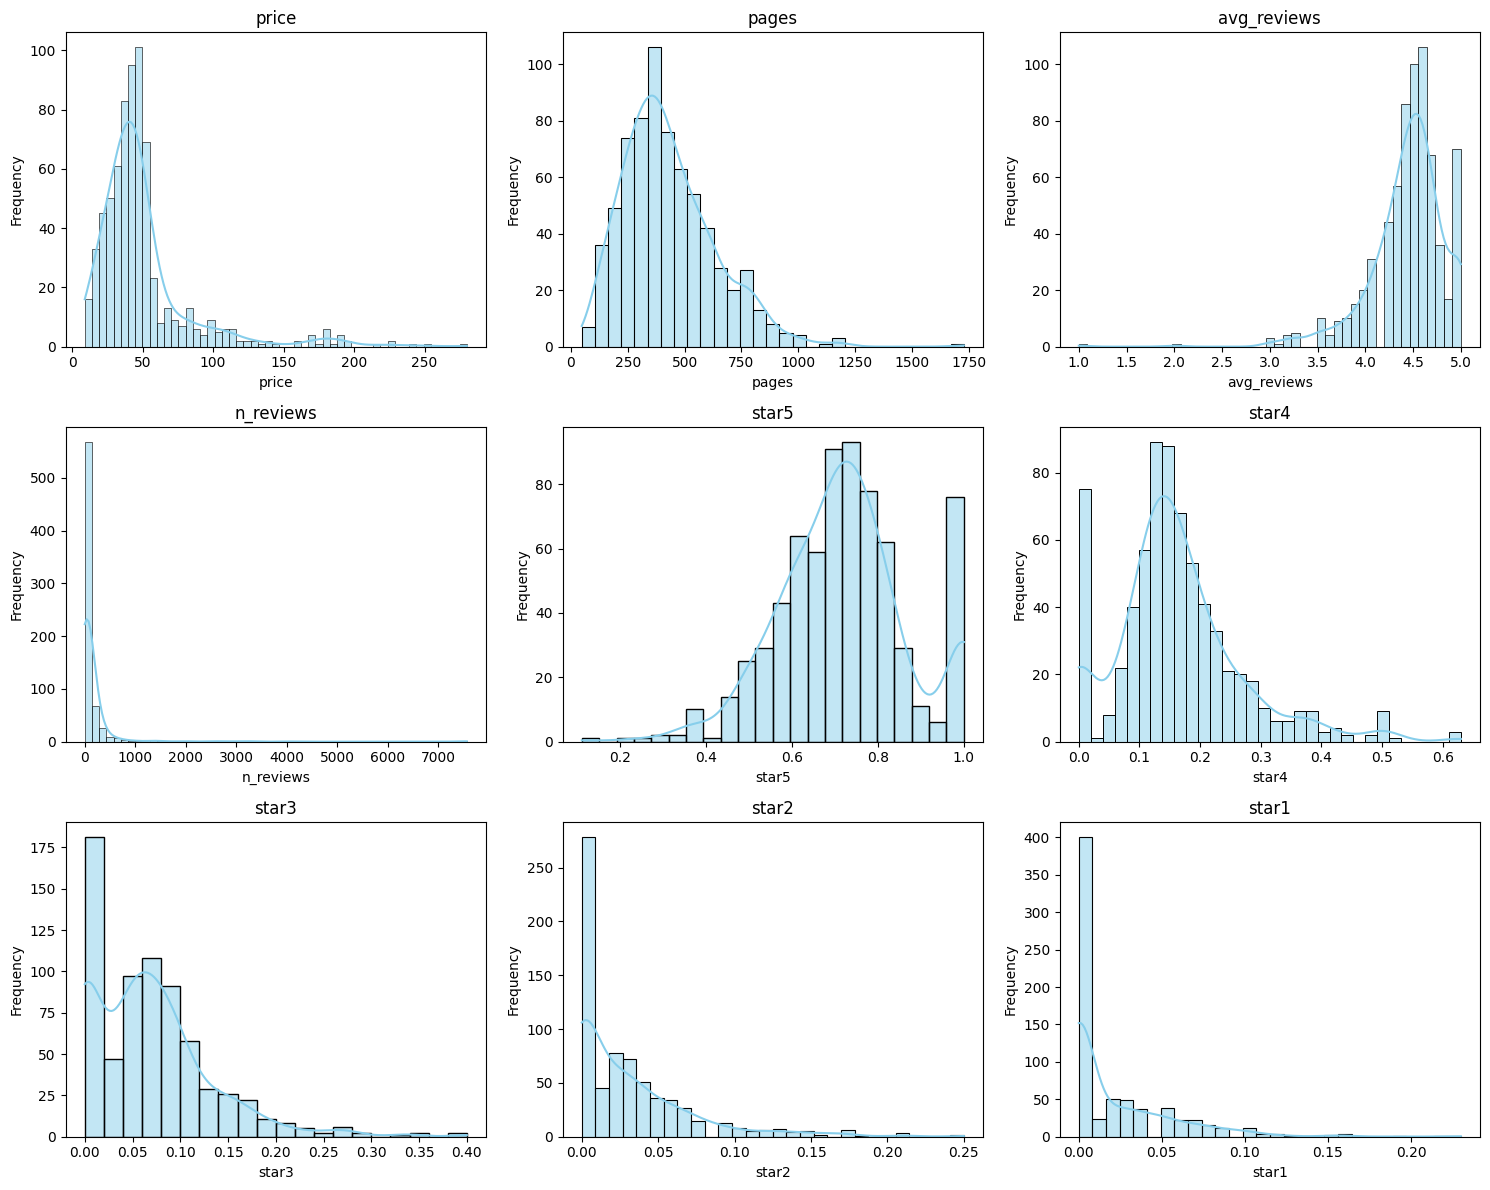

In [34]:
numeric_cols = data.select_dtypes(include='number').columns

n_cols = 3  # number of columns in grid
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(5*n_cols, 4*n_rows))
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
from scipy.stats import kurtosis

In [26]:
for col in numeric_cols:
    print(f"kurtosis for {col} :" ,kurtosis(data[col]))


kurtosis for price : 9.346212252325678
kurtosis for pages : 2.5047727449231827
kurtosis for avg_reviews : 10.015722231292512
kurtosis for n_reviews : 109.89344553449428
kurtosis for star5 : 0.37924119068212203
kurtosis for star4 : 2.375637688585292
kurtosis for star3 : 3.532300274683295
kurtosis for star2 : 5.048029384552331
kurtosis for star1 : 6.026026128307777


Columns like price, avg_reviews, n_reviews, and lower-star ratings have heavy tails → outliers are important and can skew analysis.

Columns like pages, star5, star4 are closer to normal distribution.

### Next step is to cound the number of outliers

**Method 1:Using IQR**

In [29]:
outlier_indices = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier condition
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    outlier_indices[col] = outliers.index.tolist()
    print(f"{col}: {len(outliers)} outliers")

all_outliers_idx = set(idx for col_idx in outlier_indices.values() for idx in col_idx)

# Convert the set to a list before using .loc
all_outliers = data.loc[list(all_outliers_idx)]
print(f"Total rows with outliers in any column: {len(all_outliers)}")

price: 84 outliers
pages: 13 outliers
avg_reviews: 29 outliers
n_reviews: 77 outliers
star5: 7 outliers
star4: 48 outliers
star3: 19 outliers
star2: 41 outliers
star1: 28 outliers
Total rows with outliers in any column: 261


**Method 2: Using Boxplot**

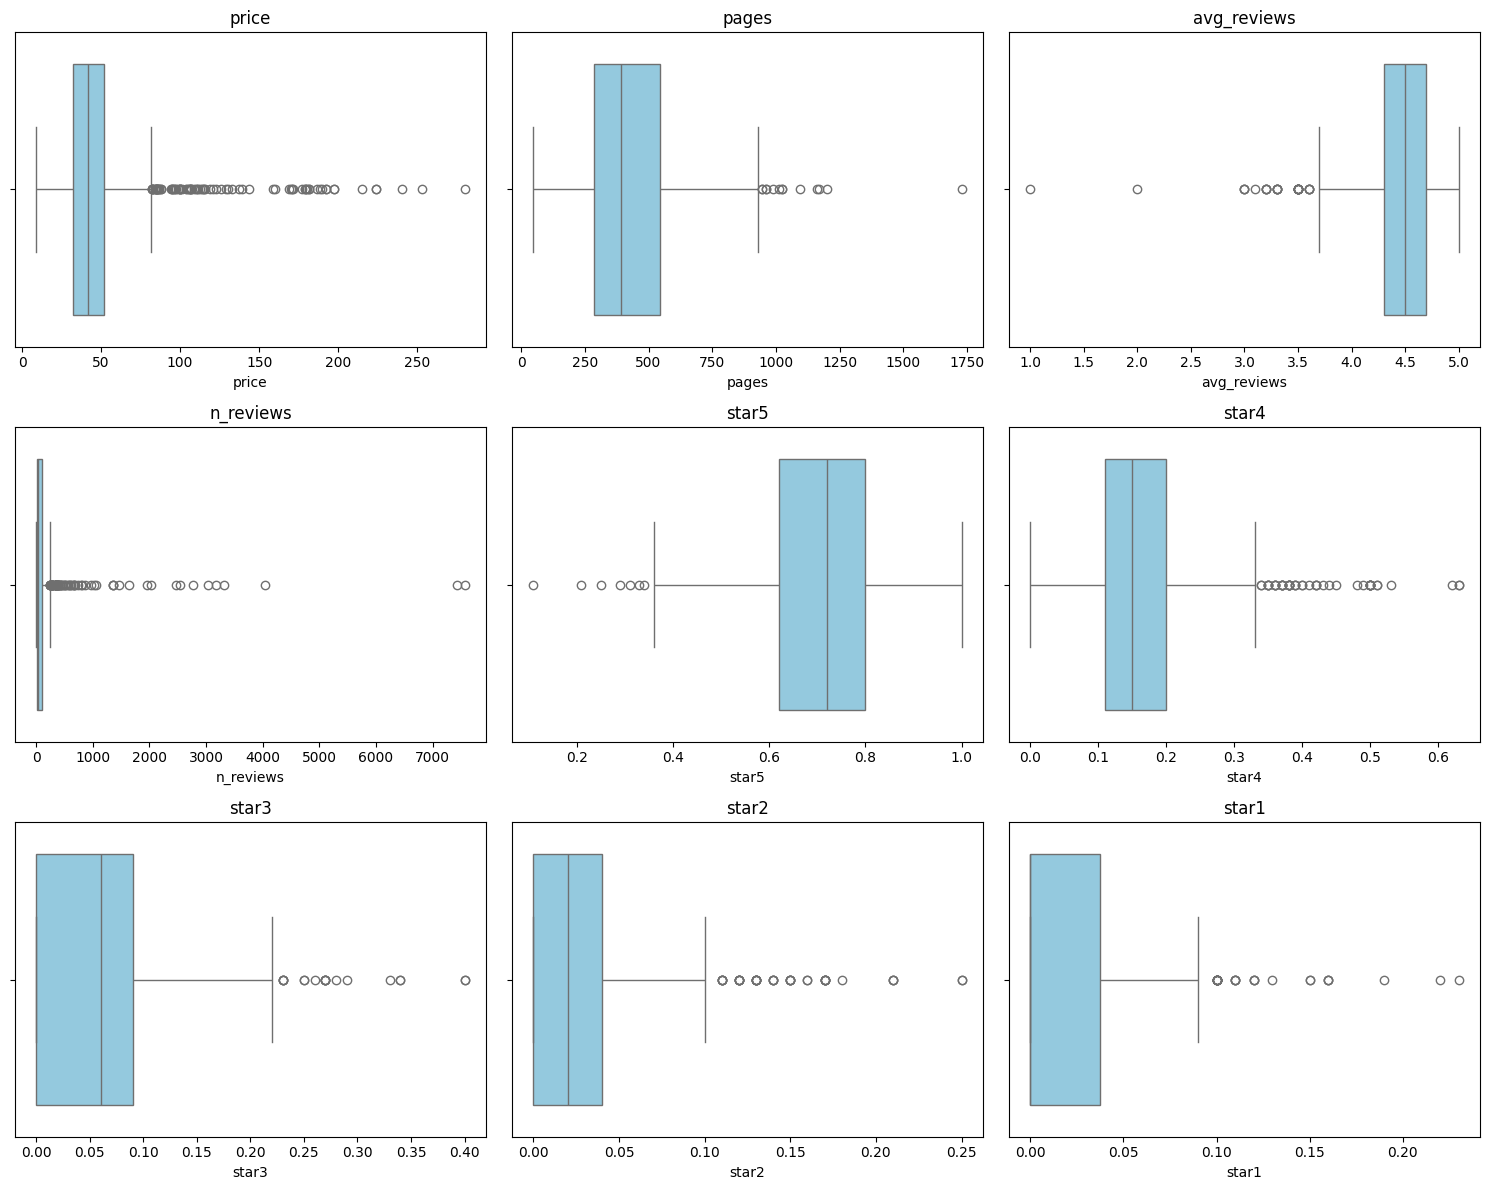

In [32]:
n_cols = 3  # number of columns in grid
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

### Comparison of columns

### **Correlation(numeric variables)**
Measures linear relationships between numeric variables.

Values range from -1 to 1:

- 1 → perfect positive correlation
- -1 → perfect negative correlation
- 0 → no linear correlation

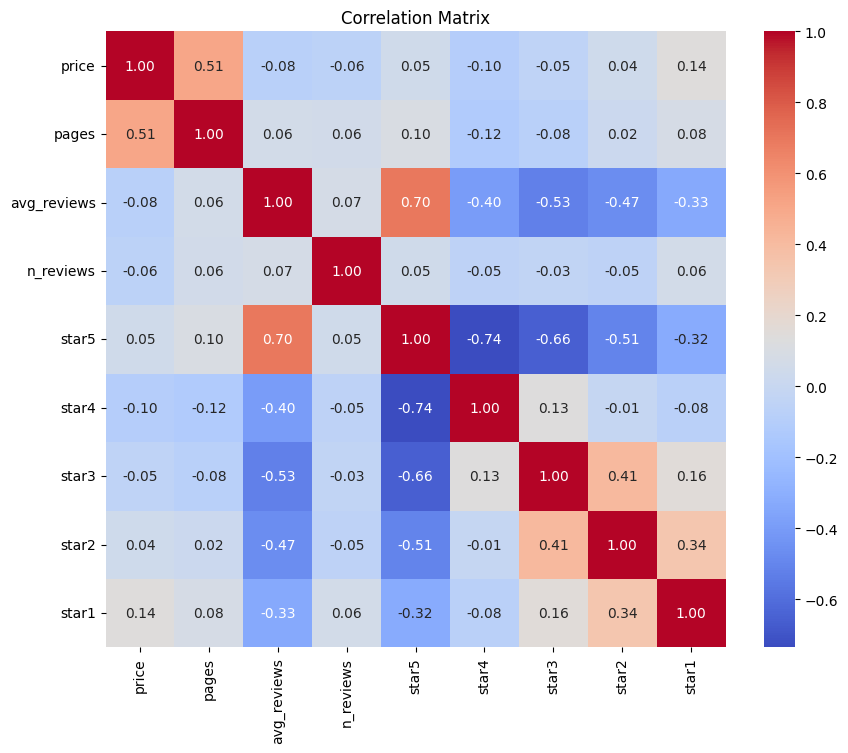

In [35]:
corr_matrix = data[numeric_cols].corr()

# Display heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### **Chi-square(categorical variables**
Tests if two categorical variables are independent.

Null hypothesis: variables are independent.

In [36]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['star1'], data['star5'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject null hypothesis → variables are dependent")
else:
    print("Fail to reject null → variables are independent")

Chi2 Statistic: 2172.8415581899812
P-value: 2.1376689151612333e-65
Reject null hypothesis → variables are dependent


### **ANOVA (Analysis of Variance, for numeric vs categorical)**

Tests if numeric variable means differ across groups.

Null hypothesis: all group means are equal

In [37]:
from scipy.stats import f_oneway

groups = [data[data['star1'] == val]['price'] for val in data['star1'].unique()]

f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

if p_val < 0.05:
    print("Reject null hypothesis → mean prices differ across star1 groups")
else:
    print("Fail to reject null → no significant difference in means")

F-statistic: 3.653008643017927
P-value: 5.509422497223888e-07
Reject null hypothesis → mean prices differ across star1 groups


### **Tukey's HSD (Honest Significant Difference)**
What it does: After ANOVA finds that some groups differ, Tukey's HSD performs pairwise comparisons to identify which specific pairs of groups are different from each other

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=data['price'],   # numeric variable
                          groups=data['star1'],  # categorical variable
                          alpha=0.05)          # significance level

Found 9 significant comparisons:
    group1  group2  meandiff   p-adj
8     0.00    0.09   40.3449  0.0241
22    0.01    0.06   38.6779  0.0265
24    0.01    0.08   46.6304  0.0064
25    0.01    0.09   56.9252  0.0016
40    0.02    0.08   39.5685  0.0134
41    0.02    0.09   49.8633  0.0035
53    0.03    0.06   32.9771  0.0339
55    0.03    0.08   40.9296  0.0083
56    0.03    0.09   51.2244  0.0022


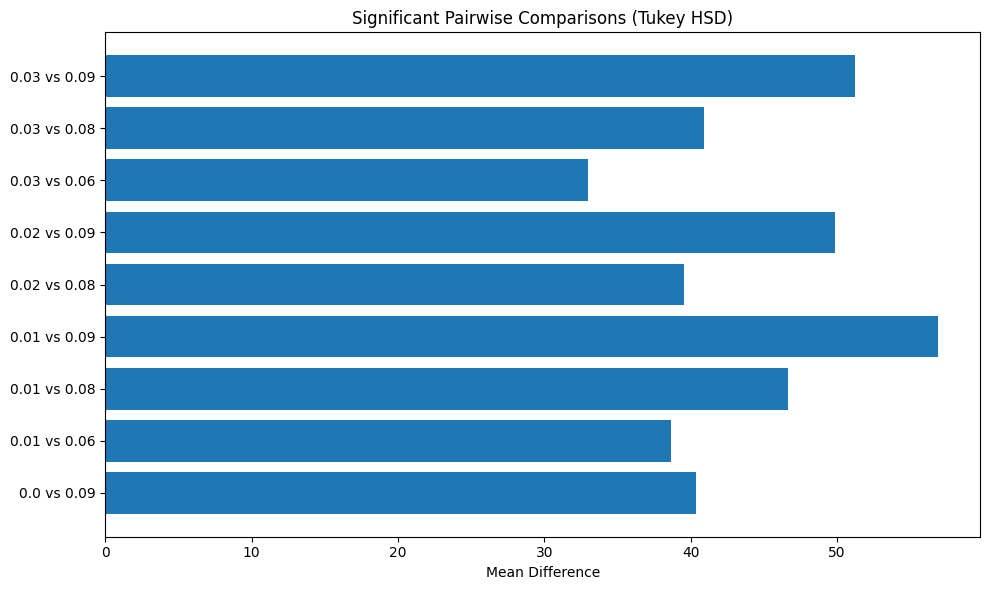

In [42]:
tukey_df = pd.DataFrame(data=tukey.summary().data[1:],
                        columns=tukey.summary().data[0])

# Filter for significant comparisons only
significant = tukey_df[tukey_df['reject'] == True]

print(f"Found {len(significant)} significant comparisons:")
print(significant[['group1', 'group2', 'meandiff', 'p-adj']])

# Create a simple visualization
plt.figure(figsize=(10, 6))
plt.barh(range(len(significant)), significant['meandiff'])
plt.yticks(range(len(significant)),
           [f"{row['group1']} vs {row['group2']}" for _, row in significant.iterrows()])
plt.xlabel('Mean Difference')
plt.title('Significant Pairwise Comparisons (Tukey HSD)')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

 Higher star ratings (like 0.08 and 0.09) have significantly different prices compared to lower ratings (0.0, 0.01, 0.02, 0.03)